In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf

from joblib import dump, load
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

In [3]:
!unzip /content/gdrive/MyDrive/CV++/image_demo.zip

Archive:  /content/gdrive/MyDrive/CV++/image_demo.zip
  inflating: image_demo/Angry_01.jpg  
  inflating: image_demo/Angry_02.jpg  
  inflating: image_demo/Angry_03.jpg  
  inflating: image_demo/Disgust_01.jpg  
  inflating: image_demo/Disgust_02.jpg  
  inflating: image_demo/Disgust_03.jpg  
  inflating: image_demo/Fear_01.jpg  
  inflating: image_demo/Fear_02.jpg  
  inflating: image_demo/Fear_03.jpg  
  inflating: image_demo/Happy_01.jpg  
  inflating: image_demo/Happy_02.jpg  
  inflating: image_demo/Happy_03.jpg  
  inflating: image_demo/Neutral_01.jpg  
  inflating: image_demo/Neutral_02.jpg  
  inflating: image_demo/Neutral_03.jpg  
  inflating: image_demo/Sad_01.jpg   
  inflating: image_demo/Sad_02.jpg   
  inflating: image_demo/Sad_03.jpg   
  inflating: image_demo/Surprise_01.jpg  
  inflating: image_demo/Surprise_02.jpg  
  inflating: image_demo/Surprise_03.jpg  


In [4]:
file_path = '/content/image_demo'
image_demo =os.path.join(file_path, file_path)
image_demo = [os.path.join(file_path, image) for image in os.listdir(file_path)]
image_demo = sorted(image_demo)
image_demo

['/content/image_demo/Angry_01.jpg',
 '/content/image_demo/Angry_02.jpg',
 '/content/image_demo/Angry_03.jpg',
 '/content/image_demo/Disgust_01.jpg',
 '/content/image_demo/Disgust_02.jpg',
 '/content/image_demo/Disgust_03.jpg',
 '/content/image_demo/Fear_01.jpg',
 '/content/image_demo/Fear_02.jpg',
 '/content/image_demo/Fear_03.jpg',
 '/content/image_demo/Happy_01.jpg',
 '/content/image_demo/Happy_02.jpg',
 '/content/image_demo/Happy_03.jpg',
 '/content/image_demo/Neutral_01.jpg',
 '/content/image_demo/Neutral_02.jpg',
 '/content/image_demo/Neutral_03.jpg',
 '/content/image_demo/Sad_01.jpg',
 '/content/image_demo/Sad_02.jpg',
 '/content/image_demo/Sad_03.jpg',
 '/content/image_demo/Surprise_01.jpg',
 '/content/image_demo/Surprise_02.jpg',
 '/content/image_demo/Surprise_03.jpg']

In [5]:
list_filename =[]
for image in image_demo:
  img_demo = image.split('/')[-1]
  img_demo = img_demo.split('_')[0]
  list_filename.append(img_demo)
list_filename

['Angry',
 'Angry',
 'Angry',
 'Disgust',
 'Disgust',
 'Disgust',
 'Fear',
 'Fear',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Neutral',
 'Neutral',
 'Neutral',
 'Sad',
 'Sad',
 'Sad',
 'Surprise',
 'Surprise',
 'Surprise']

In [6]:
CATEGORIES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
CATEGORIES_SVM = ["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]

#SVM

In [23]:
clf_rbf = load('/content/gdrive/MyDrive/CV++/Model/Models/SVM models/model_svm_clf.joblib')
clf_pl = load('/content/gdrive/MyDrive/CV++/Model/Models/SVM models/model_svm_clf_pl.joblib')

---------------------------------------------
---------------------------------------------


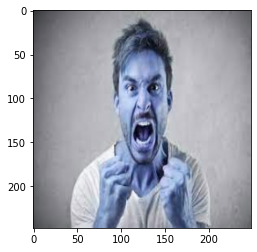

Number of detected faces: 1
True_label: Angry 
Predict_label_rbf: Angry 
Predict_label_poly: Angry


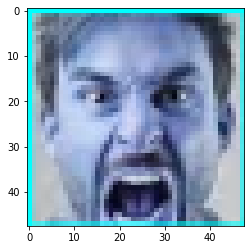

---------------------------------------------
---------------------------------------------


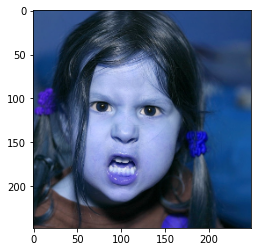

Number of detected faces: 1
True_label: Angry 
Predict_label_rbf: Angry 
Predict_label_poly: Angry


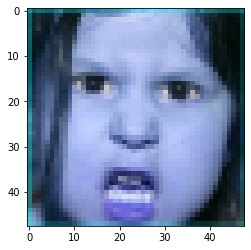

---------------------------------------------
---------------------------------------------


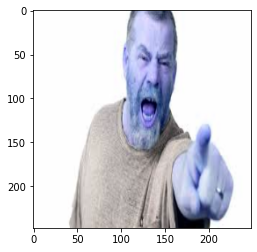

Number of detected faces: 1
True_label: Angry 
Predict_label_rbf: Angry 
Predict_label_poly: Fear


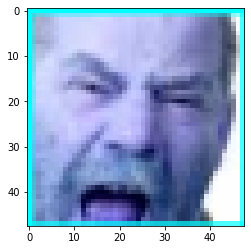

---------------------------------------------
---------------------------------------------


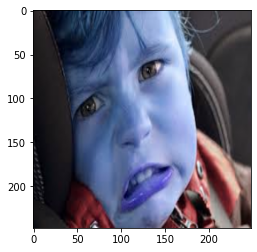

Number of detected faces: 0
True_label: Disgust 
Predict_label_rbf: Fear
---------------------------------------------
---------------------------------------------


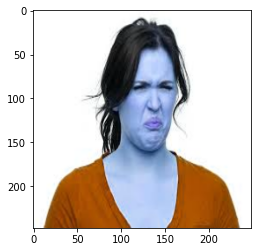

Number of detected faces: 1
True_label: Disgust 
Predict_label_rbf: Neutral 
Predict_label_poly: Neutral


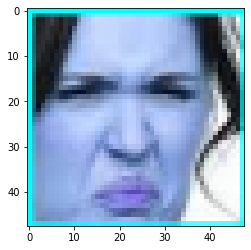

---------------------------------------------
---------------------------------------------


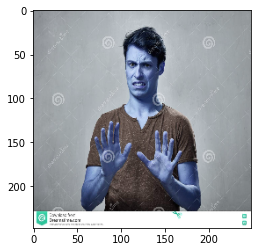

Number of detected faces: 1
True_label: Disgust 
Predict_label_rbf: Neutral 
Predict_label_poly: Disgust


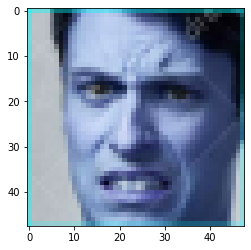

---------------------------------------------
---------------------------------------------


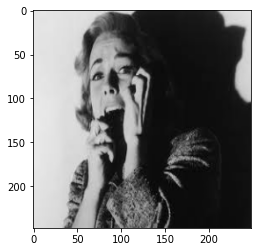

Number of detected faces: 0
True_label: Fear 
Predict_label_rbf: Sad
---------------------------------------------
---------------------------------------------


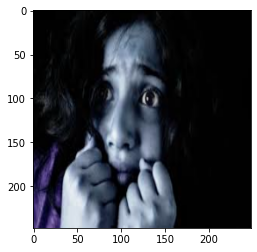

Number of detected faces: 0
True_label: Fear 
Predict_label_rbf: Sad
---------------------------------------------
---------------------------------------------


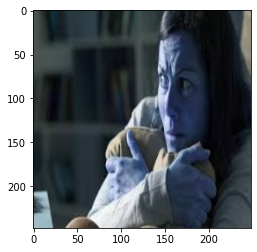

Number of detected faces: 0
True_label: Fear 
Predict_label_rbf: Sad
---------------------------------------------
---------------------------------------------


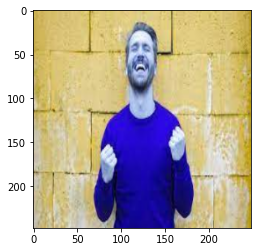

Number of detected faces: 1
True_label: Happy 
Predict_label_rbf: Sad 
Predict_label_poly: Sad


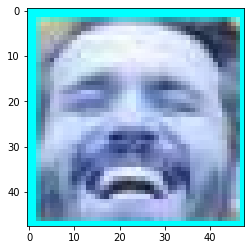

---------------------------------------------
---------------------------------------------


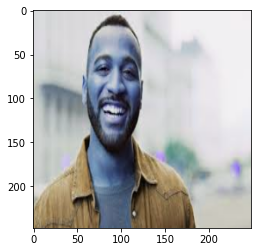

Number of detected faces: 1
True_label: Happy 
Predict_label_rbf: Happy 
Predict_label_poly: Happy


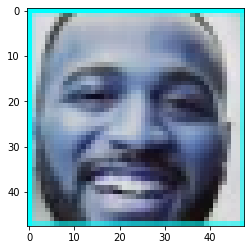

---------------------------------------------
---------------------------------------------


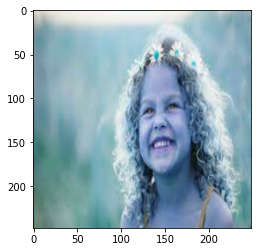

Number of detected faces: 1
True_label: Happy 
Predict_label_rbf: Happy 
Predict_label_poly: Happy


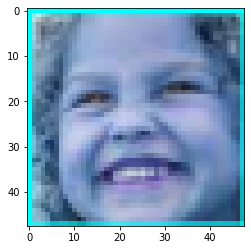

---------------------------------------------
---------------------------------------------


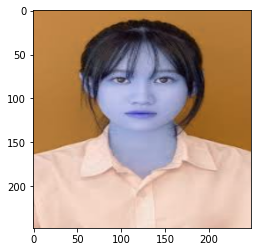

Number of detected faces: 1
True_label: Neutral 
Predict_label_rbf: Neutral 
Predict_label_poly: Neutral


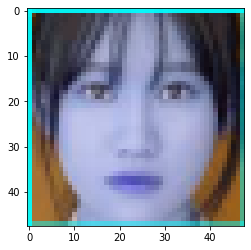

---------------------------------------------
---------------------------------------------


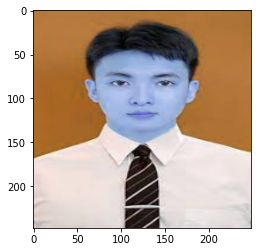

Number of detected faces: 1
True_label: Neutral 
Predict_label_rbf: Neutral 
Predict_label_poly: Neutral


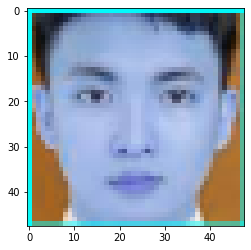

---------------------------------------------
---------------------------------------------


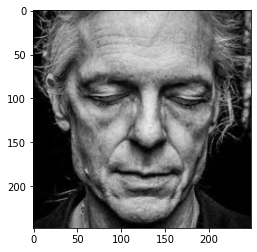

Number of detected faces: 1
True_label: Neutral 
Predict_label_rbf: Happy 
Predict_label_poly: Happy


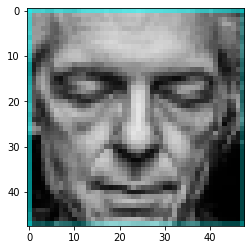

---------------------------------------------
---------------------------------------------


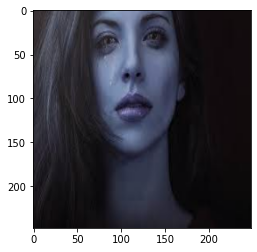

Number of detected faces: 0
True_label: Sad 
Predict_label_rbf: Sad
---------------------------------------------
---------------------------------------------


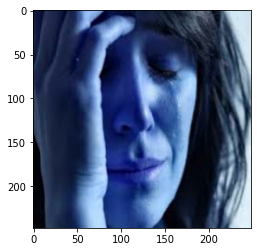

Number of detected faces: 0
True_label: Sad 
Predict_label_rbf: Surprise
---------------------------------------------
---------------------------------------------


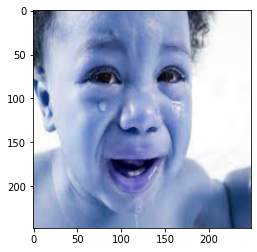

Number of detected faces: 0
True_label: Sad 
Predict_label_rbf: Fear
---------------------------------------------
---------------------------------------------


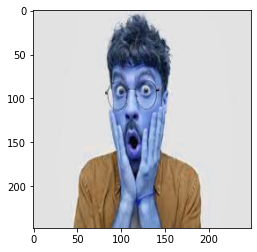

Number of detected faces: 1
True_label: Surprise 
Predict_label_rbf: Surprise 
Predict_label_poly: Surprise


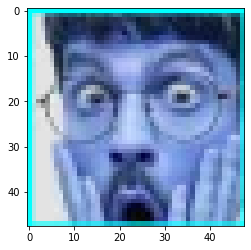

---------------------------------------------
---------------------------------------------


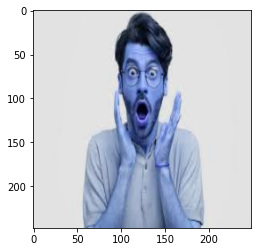

Number of detected faces: 1
True_label: Surprise 
Predict_label_rbf: Surprise 
Predict_label_poly: Surprise


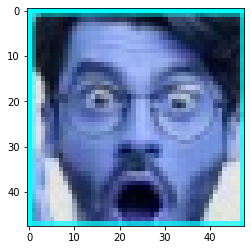

---------------------------------------------
---------------------------------------------


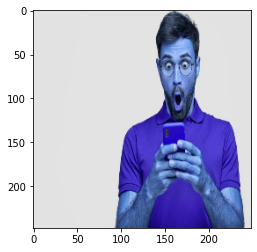

Number of detected faces: 1
True_label: Surprise 
Predict_label_rbf: Surprise 
Predict_label_poly: Surprise


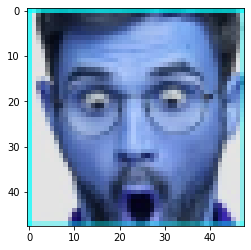

In [24]:
true_labels = []
predict_rbf_labels = []
predict_poly_labels = []
for idx_img in range(len(image_demo)):
  print("---------------------------------------------\n---------------------------------------------")
  img = cv2.imread(image_demo[idx_img])
  img_ = cv2.resize(img, (248,248))
  plt.imshow(img_)
  plt.show()

  # convert to grayscale of each frames
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

  # read the haarcascade to detect the faces in an image
  face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml')

  # detects faces in the input image
  faces = face_cascade.detectMultiScale(gray, 1.3, 4)
  print('Number of detected faces:', len(faces))

  # loop over all detected faces
  if len(faces) > 0:
    for i, (x, y, w, h) in enumerate(faces):
  
        # To draw a rectangle in a face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        face = img[y:y + h, x:x + w]
        face = cv2.resize(face, (48, 48), interpolation=cv2.INTER_AREA)
        face = face / 255
        test_image, hog_image = hog(face, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
        test_image = np.array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        test_image = test_image.reshape(1,-1)
        predict_labels_rbf = clf_rbf.predict(test_image)
        predict_labels_pl = clf_pl.predict(test_image)
        true_labels.append(list_filename[idx_img])
        predict_rbf_labels.append(CATEGORIES_SVM[predict_labels_rbf[0]])
        predict_poly_labels.append(CATEGORIES_SVM[predict_labels_pl[0]])
        print("True_label:",list_filename[idx_img], "\nPredict_label_rbf:",CATEGORIES_SVM[predict_labels_rbf[0]], "\nPredict_label_poly:",CATEGORIES_SVM[predict_labels_pl[0]])
        plt.imshow(face)
        plt.show()
  else:
    input_image = tf.keras.preprocessing.image.load_img(image_demo[idx_img], target_size = (48,48))
    # plt.imshow(input_image)
    # plt.show()
    input_image = tf.keras.preprocessing.image.img_to_array(input_image)
    test_image = input_image / 255
    test_image, hog_image = hog(test_image, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
    test_image = np.array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = test_image.reshape(1,-1)
    predict_labels = clf_rbf.predict(test_image)
    true_labels.append(list_filename[idx_img])
    predict_rbf_labels.append(CATEGORIES_SVM[predict_labels[0]])
    predict_poly_labels.append(CATEGORIES_SVM[predict_labels_pl[0]])
    print("True_label:",list_filename[idx_img], "\nPredict_label_rbf:",CATEGORIES_SVM[predict_labels[0]], )

In [25]:
count = 0
for i in range(len(true_labels)):
  if predict_rbf_labels[i] == true_labels[i]:
    count += 1
True_predict_rbf = count
Acc_rbf = count / 21 * 100
print("True_predict_rfb:", count, "\nAccuracy_rbf:", count / 21 * 100)

True_predict_rfb: 11 
Accuracy_rbf: 52.38095238095239


In [26]:
count = 0
for i in range(len(true_labels)):
  if predict_poly_labels[i] == true_labels[i]:
    count += 1
True_predict_poly = count
Acc_poly = count / 21 * 100
print("True_predict_poly:", count, "\nAccuracy_poly:", count / 21 * 100)

True_predict_poly: 10 
Accuracy_poly: 47.61904761904761


In [27]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_rbf_labels, predict_poly_labels],
    index = ['True_labels', 'Predict_rbf_labels', 'Predict_poly_labels']
).astype(object).T

True_labels Predict_rbf_labels Predict_poly_labels
0        Angry              Angry               Angry
1        Angry              Angry               Angry
2        Angry              Angry                Fear
3      Disgust               Fear                Fear
4      Disgust            Neutral             Neutral
5      Disgust            Neutral             Disgust
6         Fear                Sad             Disgust
7         Fear                Sad             Disgust
8         Fear                Sad             Disgust
9        Happy                Sad                 Sad
10       Happy              Happy               Happy
11       Happy              Happy               Happy
12     Neutral            Neutral             Neutral
13     Neutral            Neutral             Neutral
14     Neutral              Happy               Happy
15         Sad                Sad               Happy
16         Sad           Surprise               Happy
17         Sad               Fear               Happy
18    Surprise           Surprise            Surprise
19    Surprise           Surprise            Surprise
20    Surprise           Surprise            Surprise

#CNN

In [28]:
from keras.models import load_model
model= load_model('/content/gdrive/MyDrive/CV++/Model/Models/CNN/my_best_best_model.h5')

In [29]:
file_haarcascade ='/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml'
face_classifier = cv2.CascadeClassifier(file_haarcascade)

---------------------------------------------
---------------------------------------------


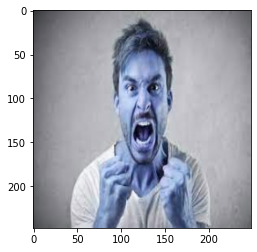

Number of detected faces: 1
1/1 [==============================] - 0s 186ms/step
True_label: Angry 
Predict_label: Angry


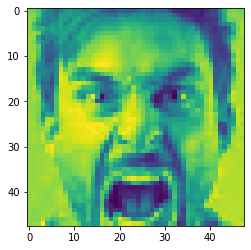

---------------------------------------------
---------------------------------------------


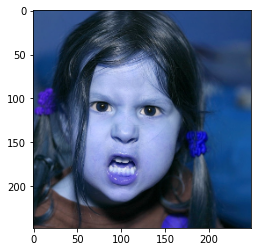

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Angry 
Predict_label: Angry


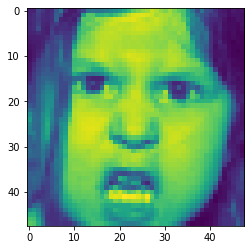

---------------------------------------------
---------------------------------------------


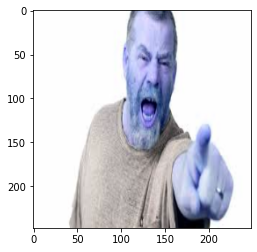

Number of detected faces: 1
1/1 [==============================] - 0s 22ms/step
True_label: Angry 
Predict_label: Angry


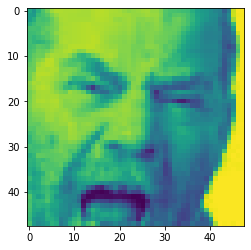

---------------------------------------------
---------------------------------------------


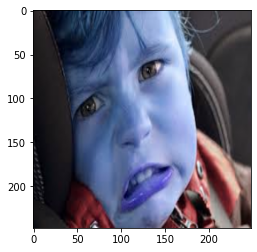

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Disgust 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


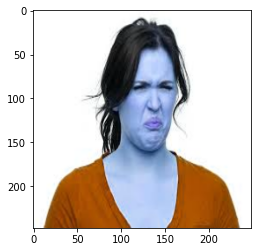

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Disgust 
Predict_label: Disgust


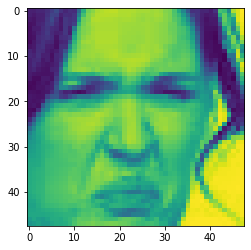

---------------------------------------------
---------------------------------------------


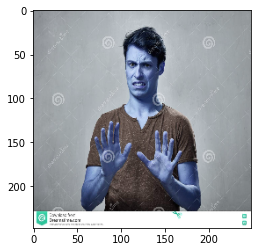

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Disgust 
Predict_label: Disgust


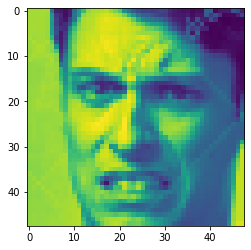

---------------------------------------------
---------------------------------------------


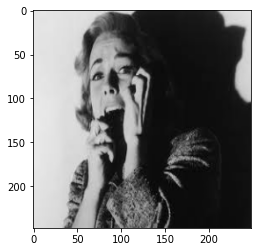

Number of detected faces: 0
1/1 [==============================] - 0s 19ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


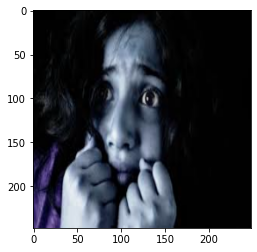

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


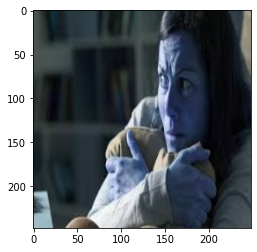

Number of detected faces: 0
1/1 [==============================] - 0s 18ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


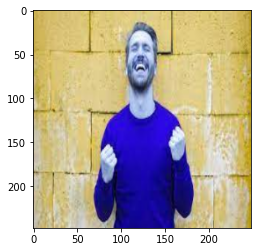

Number of detected faces: 1
1/1 [==============================] - 0s 25ms/step
True_label: Happy 
Predict_label: Happy


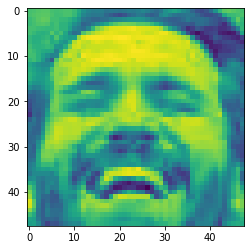

---------------------------------------------
---------------------------------------------


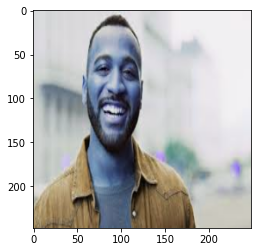

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Happy 
Predict_label: Happy


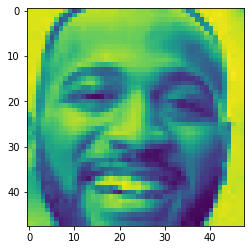

---------------------------------------------
---------------------------------------------


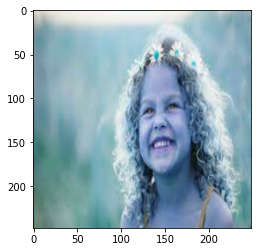

Number of detected faces: 1
1/1 [==============================] - 0s 18ms/step
True_label: Happy 
Predict_label: Happy


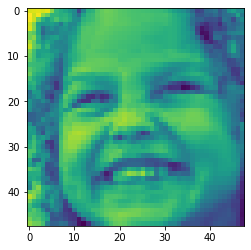

---------------------------------------------
---------------------------------------------


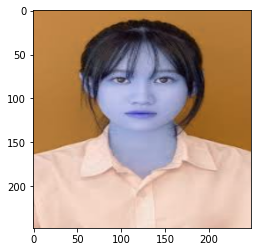

Number of detected faces: 1
1/1 [==============================] - 0s 19ms/step
True_label: Neutral 
Predict_label: Sad


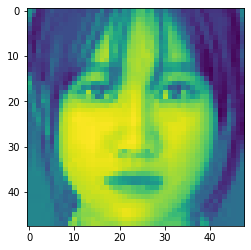

---------------------------------------------
---------------------------------------------


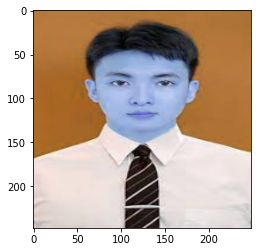

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Neutral 
Predict_label: Sad


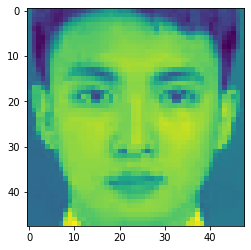

---------------------------------------------
---------------------------------------------


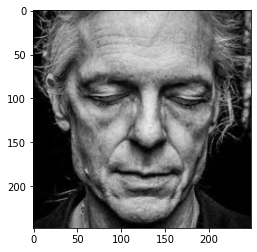

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Neutral 
Predict_label: Surprise


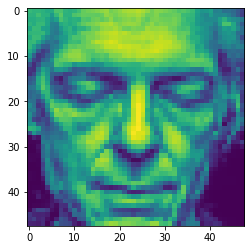

---------------------------------------------
---------------------------------------------


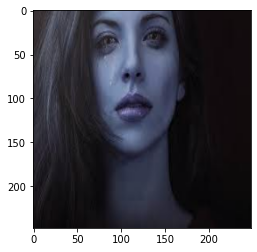

Number of detected faces: 0
1/1 [==============================] - 0s 16ms/step
True_label: Sad 
Predict_label: Surprise
---------------------------------------------
---------------------------------------------


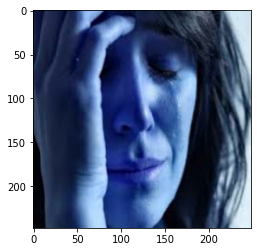

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Sad 
Predict_label: Surprise
---------------------------------------------
---------------------------------------------


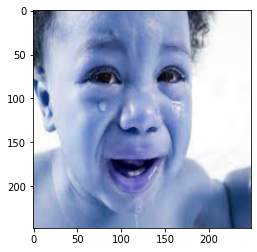

Number of detected faces: 0
1/1 [==============================] - 0s 18ms/step
True_label: Sad 
Predict_label: Happy
---------------------------------------------
---------------------------------------------


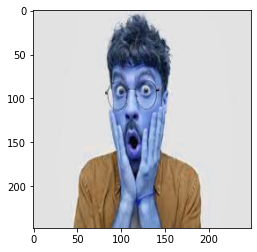

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Surprise 
Predict_label: Neutral


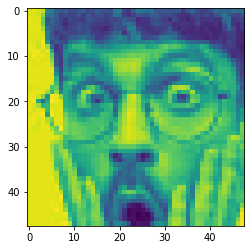

---------------------------------------------
---------------------------------------------


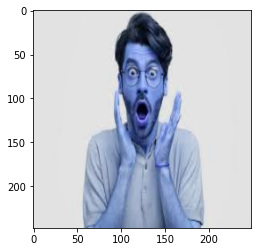

Number of detected faces: 1
1/1 [==============================] - 0s 15ms/step
True_label: Surprise 
Predict_label: Neutral


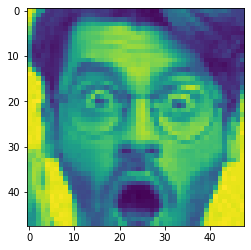

---------------------------------------------
---------------------------------------------


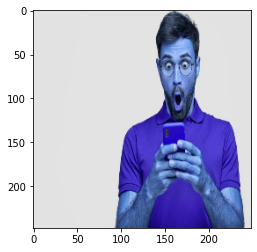

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Surprise 
Predict_label: Neutral


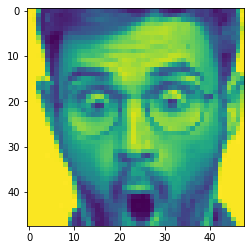

In [30]:
true_labels = []
predict_labels_CNN = []
for idx_img in range(len(image_demo)):
  print("---------------------------------------------\n---------------------------------------------")
  img = cv2.imread(image_demo[idx_img])
  img_ = cv2.resize(img, (248,248))
  plt.imshow(img_)
  plt.show()

  # convert to grayscale of each frames
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # read the haarcascade to detect the faces in an image
  face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml')

  # detects faces in the input image
  faces = face_cascade.detectMultiScale(gray, 1.3, 4)
  print('Number of detected faces:', len(faces))

  if len(faces) > 0:
    for (x, y, w, h) in faces:
          cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
          face = gray[y:y + h, x:x + w]
          face = cv2.resize(face, (48, 48), interpolation=cv2.INTER_AREA)
          roi = face.astype('float')/255.0
          roi = np.expand_dims(cv2.resize(roi, (48, 48)), -1)
          roi = np.expand_dims(roi, axis=0)

          # make a prediction on the ROI, then lookup the class
          preds = model.predict(roi)[0]
          label = CATEGORIES[preds.argmax()]
          true_labels.append(list_filename[idx_img])
          predict_labels_CNN.append(label)
          print("True_label:",list_filename[idx_img], "\nPredict_label:",label)
          plt.imshow(face)
          plt.show()
  else:
      input_image = tf.keras.preprocessing.image.load_img(image_demo[idx_img], target_size = (48,48), color_mode = 'grayscale')
      # plt.imshow(input_image)
      # plt.show()
      input_image = tf.keras.preprocessing.image.img_to_array(input_image)
      roi_gray = cv2.resize(input_image, (48, 48), interpolation=cv2.INTER_AREA)
      roi = roi_gray.astype('float')/255.0
      roi = np.expand_dims(cv2.resize(roi, (48, 48)), -1)
      roi = np.expand_dims(roi, axis=0)

      # make a prediction on the ROI, then lookup the class
      preds = model.predict(roi)[0]
      label = CATEGORIES[preds.argmax()]
      true_labels.append(list_filename[idx_img])
      predict_labels_CNN.append(label)
      print("True_label:",list_filename[idx_img], "\nPredict_label:",label)

In [31]:
count = 0
for i in range(len(true_labels)):
  if predict_labels_CNN[i] == true_labels[i]:
    count += 1
True_predict_CNN = count
Acc_CNN = count / 21 * 100
print("True_predict_poly:", count, "\nAccuracy_poly:", count / 21 * 100)

True_predict_poly: 11 
Accuracy_poly: 52.38095238095239


In [32]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_labels_CNN],
    index = ['True_labels', 'Predict_labels_CNN']
).astype(object).T

True_labels Predict_labels_CNN
0        Angry              Angry
1        Angry              Angry
2        Angry              Angry
3      Disgust               Fear
4      Disgust            Disgust
5      Disgust            Disgust
6         Fear               Fear
7         Fear               Fear
8         Fear               Fear
9        Happy              Happy
10       Happy              Happy
11       Happy              Happy
12     Neutral                Sad
13     Neutral                Sad
14     Neutral           Surprise
15         Sad           Surprise
16         Sad           Surprise
17         Sad              Happy
18    Surprise            Neutral
19    Surprise            Neutral
20    Surprise            Neutral

#VGG16

In [33]:
from keras.models import load_model
model= load_model('/content/gdrive/MyDrive/CV++/Model/Models/VGG/VGG16.h5')

---------------------------------------------
---------------------------------------------


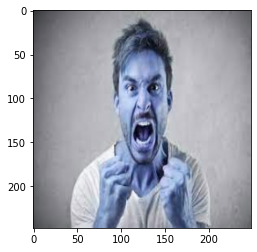

Number of detected faces: 1
1/1 [==============================] - 0s 411ms/step
True_label: Angry 
Predict_label: Angry


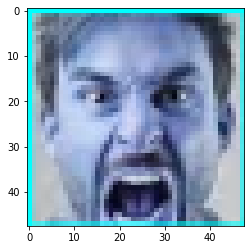

---------------------------------------------
---------------------------------------------


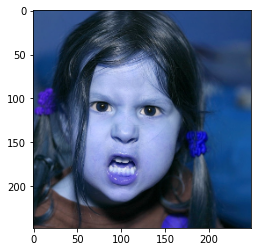

Number of detected faces: 1
1/1 [==============================] - 0s 15ms/step
True_label: Angry 
Predict_label: Angry


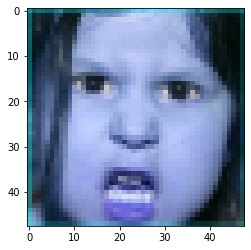

---------------------------------------------
---------------------------------------------


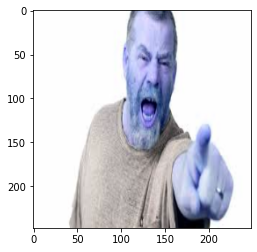

Number of detected faces: 1
1/1 [==============================] - 0s 19ms/step
True_label: Angry 
Predict_label: Angry


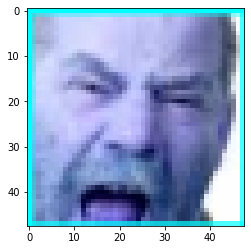

---------------------------------------------
---------------------------------------------


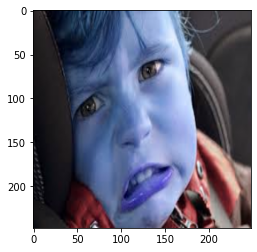

Number of detected faces: 0
1/1 [==============================] - 0s 130ms/step
True_label: Disgust 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


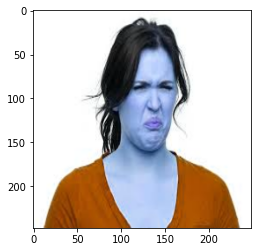

Number of detected faces: 1
1/1 [==============================] - 0s 15ms/step
True_label: Disgust 
Predict_label: Neutral


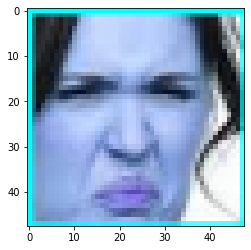

---------------------------------------------
---------------------------------------------


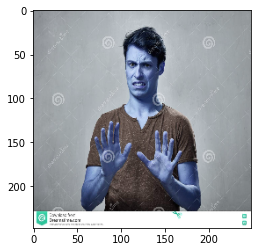

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Disgust 
Predict_label: Angry


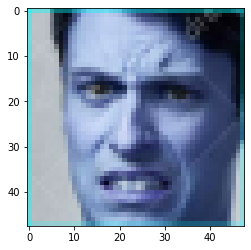

---------------------------------------------
---------------------------------------------


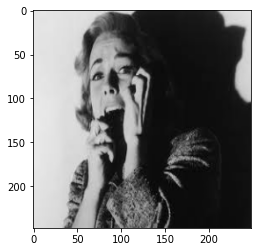

Number of detected faces: 0
1/1 [==============================] - 0s 19ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


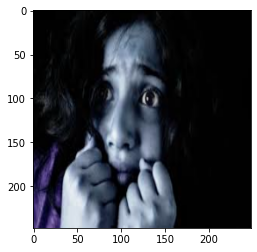

Number of detected faces: 0
1/1 [==============================] - 0s 23ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


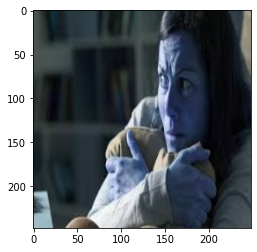

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


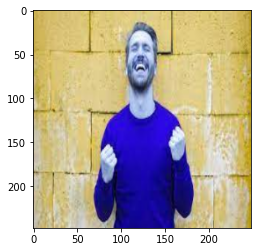

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Happy 
Predict_label: Disgust


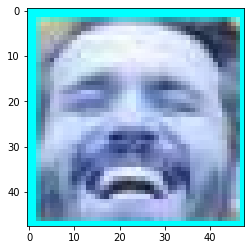

---------------------------------------------
---------------------------------------------


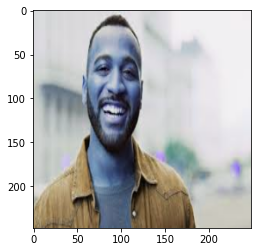

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Happy 
Predict_label: Happy


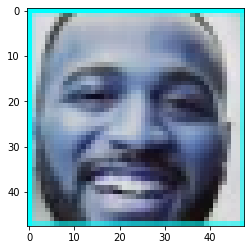

---------------------------------------------
---------------------------------------------


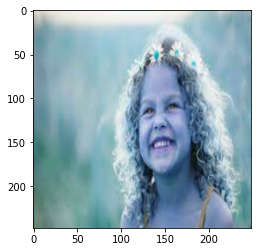

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Happy 
Predict_label: Angry


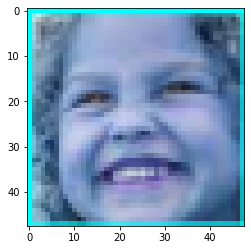

---------------------------------------------
---------------------------------------------


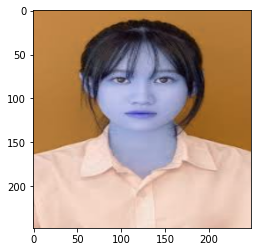

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Neutral 
Predict_label: Surprise


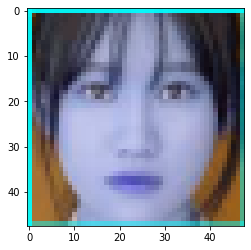

---------------------------------------------
---------------------------------------------


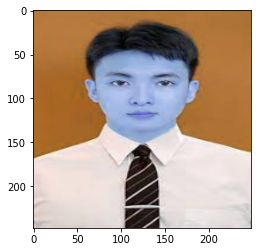

Number of detected faces: 1
1/1 [==============================] - 0s 18ms/step
True_label: Neutral 
Predict_label: Neutral


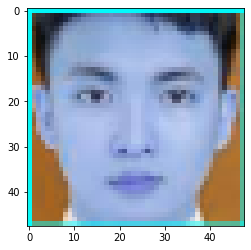

---------------------------------------------
---------------------------------------------


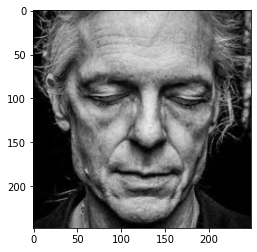

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Neutral 
Predict_label: Happy


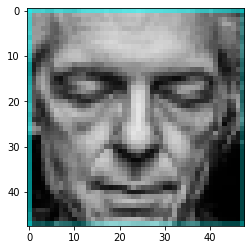

---------------------------------------------
---------------------------------------------


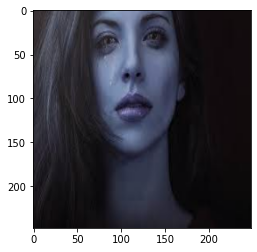

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Sad 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


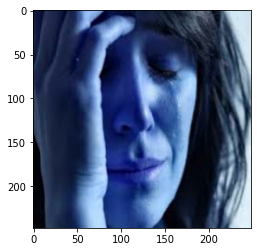

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Sad 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


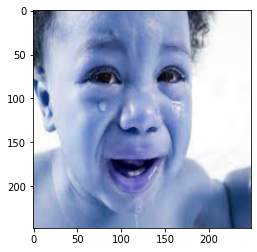

Number of detected faces: 0
1/1 [==============================] - 0s 18ms/step
True_label: Sad 
Predict_label: Happy
---------------------------------------------
---------------------------------------------


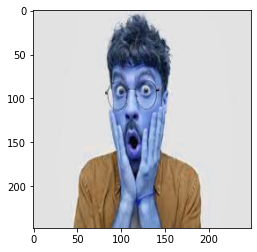

Number of detected faces: 1
1/1 [==============================] - 0s 18ms/step
True_label: Surprise 
Predict_label: Fear


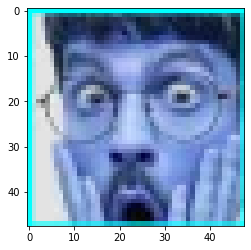

---------------------------------------------
---------------------------------------------


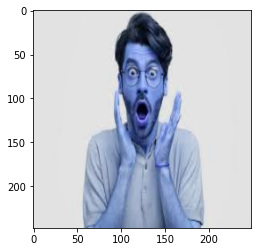

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Surprise 
Predict_label: Surprise


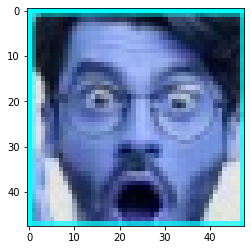

---------------------------------------------
---------------------------------------------


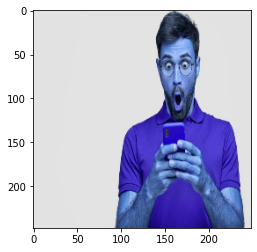

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Surprise 
Predict_label: Surprise


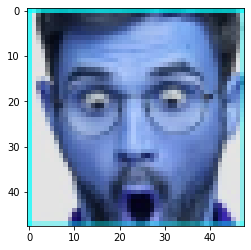

In [34]:
true_labels = []
predict_labels_VGG16 = []
for idx_img in range(len(image_demo)):
  print("---------------------------------------------\n---------------------------------------------")
  img = cv2.imread(image_demo[idx_img])
  img_ = cv2.resize(img, (248,248))
  plt.imshow(img_)
  plt.show()

  # convert to grayscale of each frames
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

  # read the haarcascade to detect the faces in an image
  face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml')

  # detects faces in the input image
  faces = face_cascade.detectMultiScale(gray, 1.3, 4)
  print('Number of detected faces:', len(faces))

  # loop over all detected faces
  if len(faces) > 0:
    for i, (x, y, w, h) in enumerate(faces):
  
        # To draw a rectangle in a face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        face = img[y:y + h, x:x + w]
        face = cv2.resize(face, (48, 48), interpolation=cv2.INTER_AREA)
        input_image = np.expand_dims(face, axis = 0)
        pred_image = model.predict(input_image)
        true_labels.append(list_filename[idx_img])
        predict_labels_VGG16.append(CATEGORIES[pred_image.argmax()])
        print("True_label:",list_filename[idx_img], "\nPredict_label:",CATEGORIES[pred_image.argmax()])
        plt.imshow(face)
        plt.show()
  else:
    input_image = tf.keras.preprocessing.image.load_img(image_demo[idx_img], target_size = (48,48))
    # plt.imshow(input_image)
    # plt.show()
    input_image = tf.keras.preprocessing.image.img_to_array(input_image)
    input_image = np.expand_dims(input_image, axis = 0)
    pred_image = model.predict(input_image)
    true_labels.append(list_filename[idx_img])
    predict_labels_VGG16.append(CATEGORIES[pred_image.argmax()])
    print("True_label:",list_filename[idx_img], "\nPredict_label:",CATEGORIES[pred_image.argmax()])

In [35]:
count = 0
for i in range(len(true_labels)):
  if predict_labels_VGG16[i] == true_labels[i]:
    count += 1
True_predict_vgg = count
Acc_vgg = count / 21 * 100
print("True_predict:", count, "\nAccuracy:", count / 21 * 100)

True_predict: 10 
Accuracy: 47.61904761904761


In [36]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_labels_VGG16],
    index = ['True_labels', 'Predict_labels_VGG16']
).astype(object).T

True_labels Predict_labels_VGG16
0        Angry                Angry
1        Angry                Angry
2        Angry                Angry
3      Disgust                 Fear
4      Disgust              Neutral
5      Disgust                Angry
6         Fear                 Fear
7         Fear                 Fear
8         Fear                 Fear
9        Happy              Disgust
10       Happy                Happy
11       Happy                Angry
12     Neutral             Surprise
13     Neutral              Neutral
14     Neutral                Happy
15         Sad                 Fear
16         Sad                 Fear
17         Sad                Happy
18    Surprise                 Fear
19    Surprise             Surprise
20    Surprise             Surprise

#VGG19

In [37]:
from keras.models import load_model
model= load_model('/content/gdrive/MyDrive/CV++/Model/Models/VGG/VGG19.h5')

---------------------------------------------
---------------------------------------------


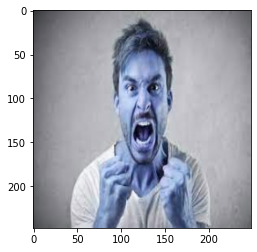

Number of detected faces: 1
1/1 [==============================] - 0s 146ms/step
True_label: Angry 
Predict_label: Angry


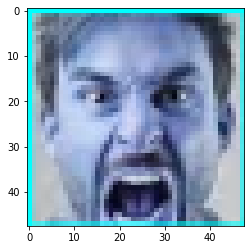

---------------------------------------------
---------------------------------------------


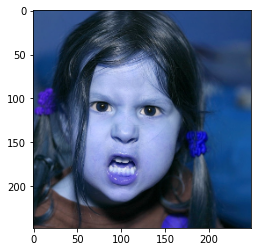

Number of detected faces: 1
1/1 [==============================] - 0s 22ms/step
True_label: Angry 
Predict_label: Neutral


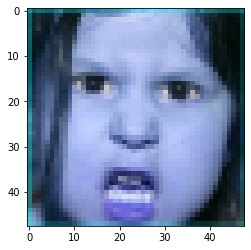

---------------------------------------------
---------------------------------------------


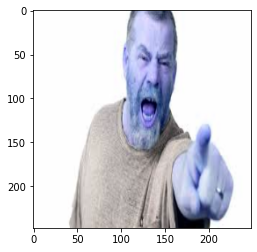

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Angry 
Predict_label: Sad


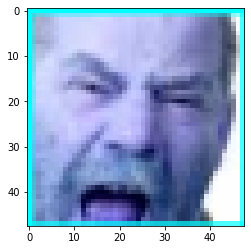

---------------------------------------------
---------------------------------------------


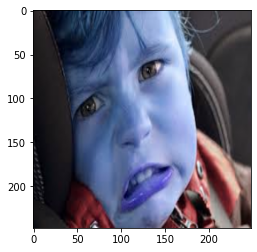

Number of detected faces: 0
1/1 [==============================] - 0s 142ms/step
True_label: Disgust 
Predict_label: Neutral
---------------------------------------------
---------------------------------------------


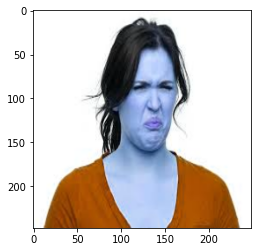

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Disgust 
Predict_label: Sad


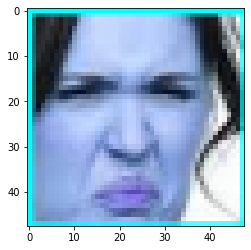

---------------------------------------------
---------------------------------------------


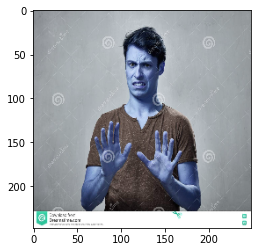

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Disgust 
Predict_label: Happy


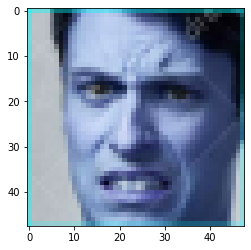

---------------------------------------------
---------------------------------------------


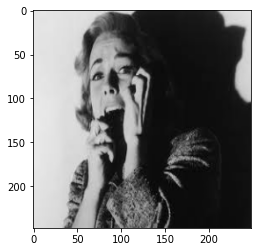

Number of detected faces: 0
1/1 [==============================] - 0s 16ms/step
True_label: Fear 
Predict_label: Sad
---------------------------------------------
---------------------------------------------


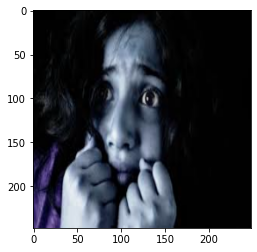

Number of detected faces: 0
1/1 [==============================] - 0s 18ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


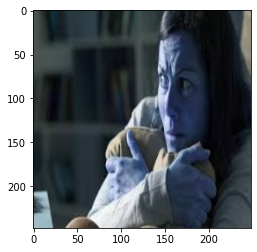

Number of detected faces: 0
1/1 [==============================] - 0s 16ms/step
True_label: Fear 
Predict_label: Fear
---------------------------------------------
---------------------------------------------


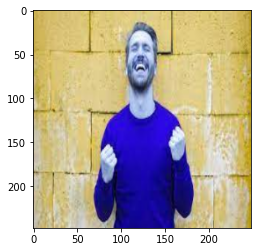

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Happy 
Predict_label: Happy


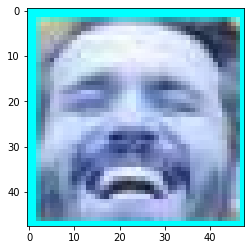

---------------------------------------------
---------------------------------------------


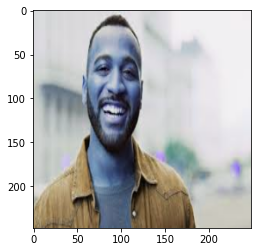

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Happy 
Predict_label: Happy


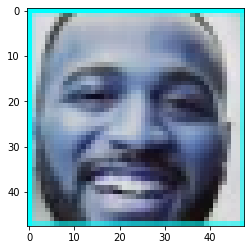

---------------------------------------------
---------------------------------------------


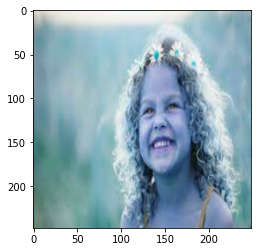

Number of detected faces: 1
1/1 [==============================] - 0s 19ms/step
True_label: Happy 
Predict_label: Happy


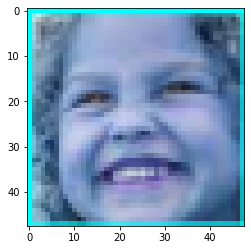

---------------------------------------------
---------------------------------------------


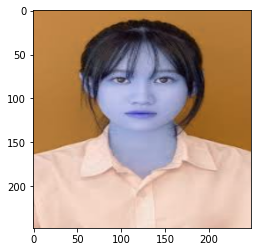

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Neutral 
Predict_label: Neutral


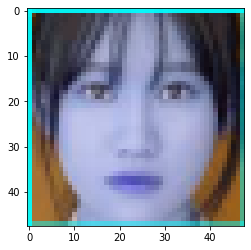

---------------------------------------------
---------------------------------------------


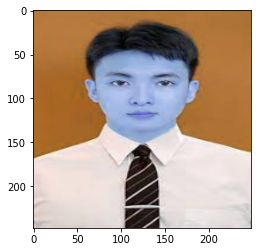

Number of detected faces: 1
1/1 [==============================] - 0s 18ms/step
True_label: Neutral 
Predict_label: Neutral


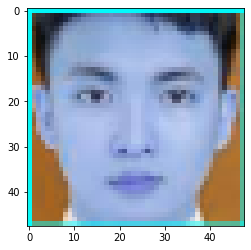

---------------------------------------------
---------------------------------------------


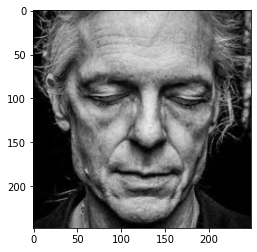

Number of detected faces: 1
1/1 [==============================] - 0s 17ms/step
True_label: Neutral 
Predict_label: Happy


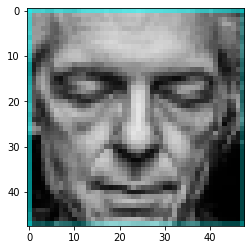

---------------------------------------------
---------------------------------------------


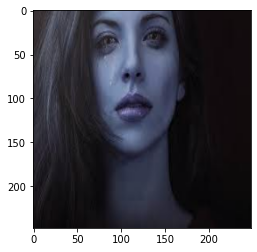

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Sad 
Predict_label: Sad
---------------------------------------------
---------------------------------------------


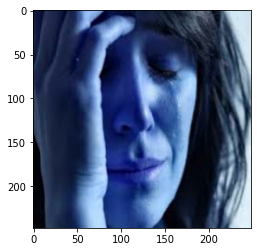

Number of detected faces: 0
1/1 [==============================] - 0s 17ms/step
True_label: Sad 
Predict_label: Happy
---------------------------------------------
---------------------------------------------


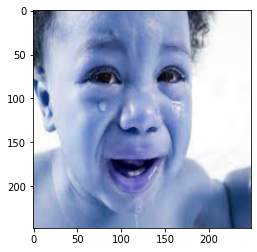

Number of detected faces: 0
1/1 [==============================] - 0s 16ms/step
True_label: Sad 
Predict_label: Happy
---------------------------------------------
---------------------------------------------


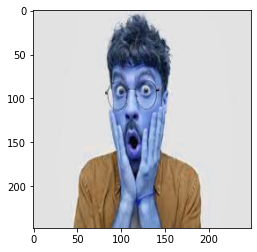

Number of detected faces: 1
1/1 [==============================] - 0s 19ms/step
True_label: Surprise 
Predict_label: Fear


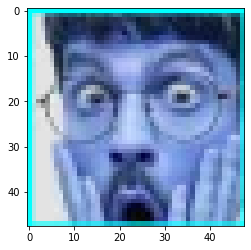

---------------------------------------------
---------------------------------------------


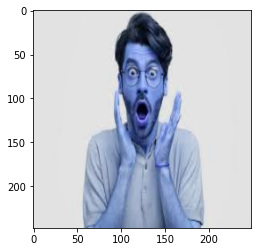

Number of detected faces: 1
1/1 [==============================] - 0s 19ms/step
True_label: Surprise 
Predict_label: Surprise


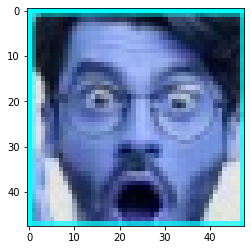

---------------------------------------------
---------------------------------------------


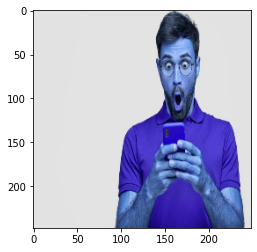

Number of detected faces: 1
1/1 [==============================] - 0s 16ms/step
True_label: Surprise 
Predict_label: Surprise


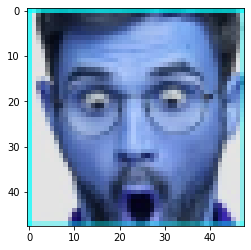

In [38]:
true_labels = []
predict_labels_VGG19 = []
for idx_img in range(len(image_demo)):
  print("---------------------------------------------\n---------------------------------------------")
  img = cv2.imread(image_demo[idx_img])
  img_ = cv2.resize(img, (248,248))
  plt.imshow(img_)
  plt.show()

  # convert to grayscale of each frames
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

  # read the haarcascade to detect the faces in an image
  face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml')

  # detects faces in the input image
  faces = face_cascade.detectMultiScale(gray, 1.3, 4)
  print('Number of detected faces:', len(faces))

  # loop over all detected faces
  if len(faces) > 0:
    for i, (x, y, w, h) in enumerate(faces):
  
        # To draw a rectangle in a face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        face = img[y:y + h, x:x + w]
        face = cv2.resize(face, (48, 48), interpolation=cv2.INTER_AREA)
        input_image = np.expand_dims(face, axis = 0)
        pred_image = model.predict(input_image)
        true_labels.append(list_filename[idx_img])
        predict_labels_VGG19.append(CATEGORIES[pred_image.argmax()])
        print("True_label:",list_filename[idx_img], "\nPredict_label:",CATEGORIES[pred_image.argmax()])
        plt.imshow(face)
        plt.show()
  else:
    input_image = tf.keras.preprocessing.image.load_img(image_demo[idx_img], target_size = (48,48))
    # plt.imshow(input_image)
    # plt.show()
    input_image = tf.keras.preprocessing.image.img_to_array(input_image)
    input_image = np.expand_dims(input_image, axis = 0)
    pred_image = model.predict(input_image)
    true_labels.append(list_filename[idx_img])
    predict_labels_VGG19.append(CATEGORIES[pred_image.argmax()])
    print("True_label:",list_filename[idx_img], "\nPredict_label:",CATEGORIES[pred_image.argmax()])

In [39]:
count = 0
for i in range(len(true_labels)):
  if predict_labels_VGG19[i] == true_labels[i]:
    count += 1
True_predict_vgg_19 = count
Acc_vgg_19 = count / 21 * 100
print("True_predict:", count, "\nAccuracy:", count / 21 * 100)

True_predict: 11 
Accuracy: 52.38095238095239


In [40]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_labels_VGG19],
    index = ['True_labels', 'Predict_labels_VGG19']
).astype(object).T

True_labels Predict_labels_VGG19
0        Angry                Angry
1        Angry              Neutral
2        Angry                  Sad
3      Disgust              Neutral
4      Disgust                  Sad
5      Disgust                Happy
6         Fear                  Sad
7         Fear                 Fear
8         Fear                 Fear
9        Happy                Happy
10       Happy                Happy
11       Happy                Happy
12     Neutral              Neutral
13     Neutral              Neutral
14     Neutral                Happy
15         Sad                  Sad
16         Sad                Happy
17         Sad                Happy
18    Surprise                 Fear
19    Surprise             Surprise
20    Surprise             Surprise

In [41]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_labels_VGG16, predict_labels_VGG19],
    index = ['True_labels', 'Predict_labels_VGG16', 'Predict_labels_VGG19']
).astype(object).T

True_labels Predict_labels_VGG16 Predict_labels_VGG19
0        Angry                Angry                Angry
1        Angry                Angry              Neutral
2        Angry                Angry                  Sad
3      Disgust                 Fear              Neutral
4      Disgust              Neutral                  Sad
5      Disgust                Angry                Happy
6         Fear                 Fear                  Sad
7         Fear                 Fear                 Fear
8         Fear                 Fear                 Fear
9        Happy              Disgust                Happy
10       Happy                Happy                Happy
11       Happy                Angry                Happy
12     Neutral             Surprise              Neutral
13     Neutral              Neutral              Neutral
14     Neutral                Happy                Happy
15         Sad                 Fear                  Sad
16         Sad                 Fear                Happy
17         Sad                Happy                Happy
18    Surprise                 Fear                 Fear
19    Surprise             Surprise             Surprise
20    Surprise             Surprise             Surprise

#Conclude

In [42]:
import pandas as pd
pd.DataFrame(
    [true_labels, predict_rbf_labels, predict_poly_labels, predict_labels_CNN, predict_labels_VGG16, predict_labels_VGG19],
    index = ['True_labels', 'Predict_rbf_labels(SVM)', 'Predict_poly_labels(SVM)','Predict_labels_CNN' ,'Predict_labels_VGG16', 'Predict_labels_VGG19',]
).astype(object).T

True_labels Predict_rbf_labels(SVM) Predict_poly_labels(SVM)  \
0        Angry                   Angry                    Angry   
1        Angry                   Angry                    Angry   
2        Angry                   Angry                     Fear   
3      Disgust                    Fear                     Fear   
4      Disgust                 Neutral                  Neutral   
5      Disgust                 Neutral                  Disgust   
6         Fear                     Sad                  Disgust   
7         Fear                     Sad                  Disgust   
8         Fear                     Sad                  Disgust   
9        Happy                     Sad                      Sad   
10       Happy                   Happy                    Happy   
11       Happy                   Happy                    Happy   
12     Neutral                 Neutral                  Neutral   
13     Neutral                 Neutral                  Neutral   
14     Neutral                   Happy                    Happy   
15         Sad                     Sad                    Happy   
16         Sad                Surprise                    Happy   
17         Sad                    Fear                    Happy   
18    Surprise                Surprise                 Surprise   
19    Surprise                Surprise                 Surprise   
20    Surprise                Surprise                 Surprise   

   Predict_labels_CNN Predict_labels_VGG16 Predict_labels_VGG19  
0               Angry                Angry                Angry  
1               Angry                Angry              Neutral  
2               Angry                Angry                  Sad  
3                Fear                 Fear              Neutral  
4             Disgust              Neutral                  Sad  
5             Disgust                Angry                Happy  
6                Fear                 Fear                  Sad  
7                Fear                 Fear                 Fear  
8                Fear                 Fear                 Fear  
9               Happy              Disgust                Happy  
10              Happy                Happy                Happy  
11              Happy                Angry                Happy  
12                Sad             Surprise              Neutral  
13                Sad              Neutral              Neutral  
14           Surprise                Happy                Happy  
15           Surprise                 Fear                  Sad  
16           Surprise                 Fear                Happy  
17              Happy                Happy                Happy  
18            Neutral                 Fear                 Fear  
19            Neutral             Surprise             Surprise  
20            Neutral             Surprise             Surprise

In [43]:
def conclude(acc, count):
  return {'True_predict': count,
          'Accuracy': acc}

In [45]:
vgg = conclude(Acc_vgg, True_predict_vgg)
vgg_19 = conclude(Acc_vgg_19, True_predict_vgg_19)
cnn = conclude(Acc_CNN, True_predict_CNN)
rbf = conclude(Acc_rbf, True_predict_rbf)
poly = conclude(Acc_poly, True_predict_poly)
pd.DataFrame(
    [rbf, poly, cnn, vgg, vgg_19],
    index = ['RBF(SVM)', 'Poly(SVM)', 'CNN', 'VGG16', 'VGG19']
).astype(object).T

RBF(SVM)  Poly(SVM)        CNN      VGG16      VGG19
True_predict         11         10         11         10         11
Accuracy      52.380952  47.619048  52.380952  47.619048  52.380952

#Demo

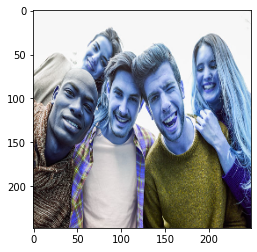

Number of detected faces: 2
1/1 [==============================] - 0s 17ms/step
Predict_label: Angry


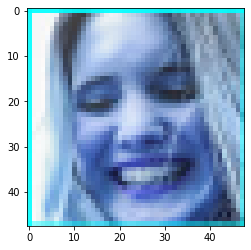

1/1 [==============================] - 0s 17ms/step
Predict_label: Happy


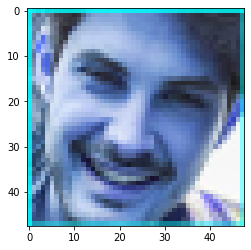

In [47]:
img = cv2.imread('/content/49207484077_6e3bce8965_o.jpg')
img_ = cv2.resize(img, (248,248))
plt.imshow(img_)
plt.show()

  # convert to grayscale of each frames
gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

  # read the haarcascade to detect the faces in an image
face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/CV++/haarcascade_frontalface_default.xml')

  # detects faces in the input image
faces = face_cascade.detectMultiScale(gray, 1.3, 4)
print('Number of detected faces:', len(faces))

  # loop over all detected faces
if len(faces) > 0:
    for i, (x, y, w, h) in enumerate(faces):
  
        # To draw a rectangle in a face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        face = img[y:y + h, x:x + w]
        face = cv2.resize(face, (48, 48), interpolation=cv2.INTER_AREA)
        input_image = np.expand_dims(face, axis = 0)
        pred_image = model.predict(input_image)
        print("Predict_label:",CATEGORIES[pred_image.argmax()])
        plt.imshow(face)
        plt.show()